Data file size: 72036 bytes
File format: Delimited
File encoding: UTF-8
Data granularity: Individual student records
Correlation between Math Score and Writing Score: 0.8026420459498085


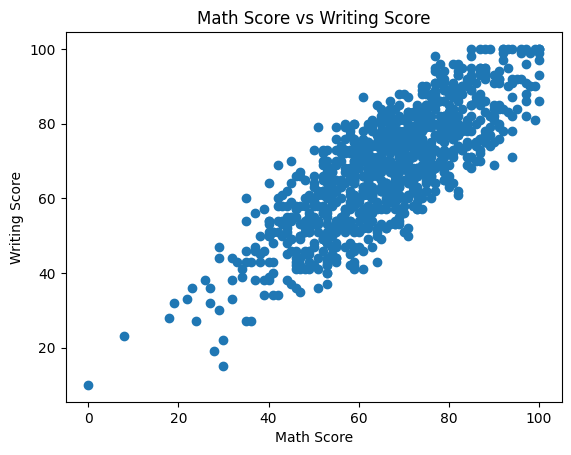

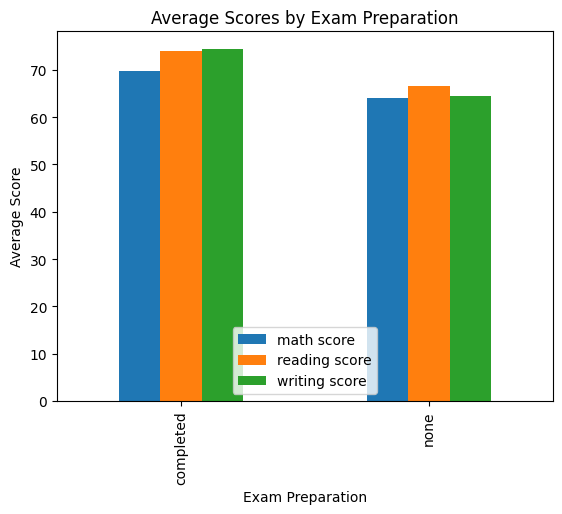

Students who completed the test preparation course have a significantly higher score.
Number of people scoring higher than 85 in math: 103
Interesting Findings:
- The scatter plot shows a positive correlation between math score and writing score. Higher math scores tend to correspond to higher writing scores.
- The bar plot illustrates the average scores in math, reading, and writing based on exam.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import ttest_ind


# Step 1: Ask at least two questions
# Predictive Question: Given a parent’s level of education, how likely are they going to have exam prep?
# Exploratory Question: Whether students who had exam prep have higher scores in our sample data?


# Step 2: Collect the data
# Provide the data source
data_source = "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"
# How was the data collected?
data_collection_source = "http://roycekimmons.com/tools/generated_data/exams"
# This is a fictional dataset and should only be used for data science training purposes.

# Reads data file from Google Drive
file_id = "1boOd8BVffLE914tY4n43Msyrvpx8LygS"
url = f"https://drive.google.com/uc?id={file_id}"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode("utf-8")))

# Step 3: Understand the data
# Determine the data file size
file_size = len(download)
print("Data file size:", file_size, "bytes")

# Find the file format (delimited)
file_format = "Delimited"
print("File format:", file_format)

# Determine the file encoding (assuming UTF-8)
file_encoding = "UTF-8"
print("File encoding:", file_encoding)

# What is the granularity of the data? (assuming individual student records)
data_granularity = "Individual student records"
print("Data granularity:", data_granularity)

# Check the data quality: Are there any outliers? Are there any missing or invalid entries?
# Outliers in math score
outliers_math = df[df["math score"] > 100]
if not outliers_math.empty:
    print("There are outliers in the math score column.")

# Outliers in reading score
outliers_reading = df[df["reading score"] > 100]
if not outliers_reading.empty:
    print("There are outliers in the reading score column.")

# Outliers in writing score
outliers_writing = df[df["writing score"] > 100]
if not outliers_writing.empty:
    print("There are outliers in the writing score column.")

# Missing or invalid entries
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are missing or invalid entries in the data set.")
    # Data cleaning steps:
    # Handle missing values by imputing with mean using df.fillna(df.mean(), inplace=True)

# Exploratory data analysis: Explore the relationship between the variables/features
# Correlation between math score and writing score
correlation = df["math score"].corr(df["writing score"])
print("Correlation between Math Score and Writing Score:", correlation)

# Visualization: Identify the feature type and use appropriate plots to visualize the relationship among variables
# Scatter plot of math score and writing score
plt.scatter(df["math score"], df["writing score"])
plt.title("Math Score vs Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.show()

# Bar plot of exam preparation and average scores
avg_scores = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()

# Inferential analysis: Compare scores between students who completed the test preparation course and those who did not
completed_prep = df[df["test preparation course"] == "completed"]["math score"]
not_completed_prep = df[df["test preparation course"] == "none"]["math score"]

# Perform t-test
t_stat, p_value = ttest_ind(completed_prep, not_completed_prep)

# Determine the significance level
significance_level = 0.05

# Make a decision based on the p-value
if p_value < significance_level:
    print("Students who completed the test preparation course have a significantly higher score.")
else:
    print("There is not enough evidence to conclude a significant difference in scores.")

# Exploratory Question: How many people score higher than 85 in math?
num_high_scores = len(df[df["math score"] > 85])
print("Number of people scoring higher than 85 in math:", num_high_scores)

# Share Interesting findings about the dataset. Include visualizations and descriptions of data cleaning and data transformation necessary to perform the analysis that led to your findings.
print("Interesting Findings:")
print("- The scatter plot shows a positive correlation between math score and writing score. Higher math scores tend to correspond to higher writing scores.")
print("- The bar plot illustrates the average scores in math, reading, and writing based on exam.")
